In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(10)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


Scatter plot with matplotlib

Text(0,0.5,'Combined Fuel Eff. (mpg)')

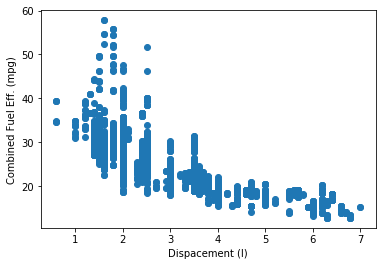

In [4]:
plt.scatter(data= fuel_econ, x= 'displ', y = 'comb');
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Another way to create a scatter plot with a regression line (Seaborn):

Text(0,0.5,'Combined Fuel Eff. (mpg)')

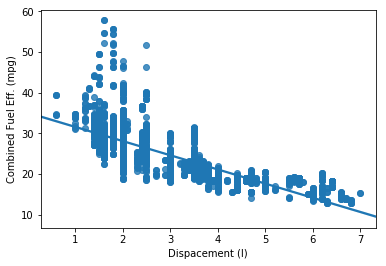

In [5]:
sb.regplot(data= fuel_econ, x= 'displ', y = 'comb', fit_reg = True);
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Overplotting: Transparency and jitter

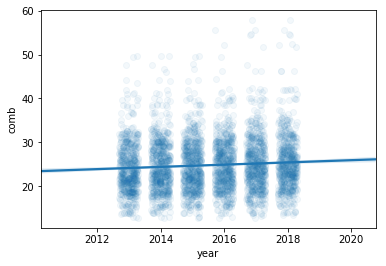

In [6]:
sb.regplot(data= fuel_econ, x= 'year', y= 'comb', x_jitter= 0.3, scatter_kws= {'alpha': 1/20});

Now the first graph with scattering and transparency:

Text(0,0.5,'Combined Fuel Eff. (mpg)')

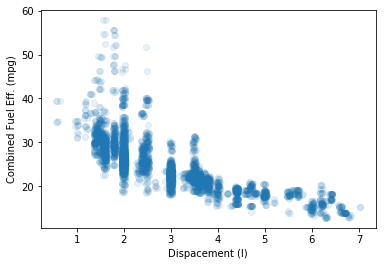

In [7]:
sb.regplot(data= fuel_econ, x= 'displ', y = 'comb', x_jitter= 0.04, scatter_kws={'alpha': 1/10}, fit_reg= False);
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

## Heatmap

Text(0,0.5,'Combined Fuel Eff. (mpg)')

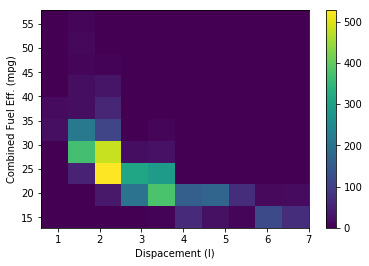

In [8]:
plt.hist2d(data= fuel_econ, x= 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Let's use some more arguments to the hist2d function to improve our heatmap:

1. **cmin** sets the minimum count to colour a bin
2. **cmap** selects the color mappin. Viridis is the default and _r is reversed
3. **bins** lets us specify our bins boundaries

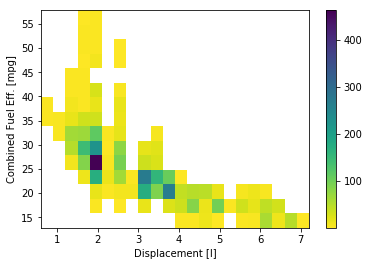

In [9]:
statistics = fuel_econ[['displ', 'comb']].describe()
bins_x = np.arange(statistics['displ']['min'], statistics['displ']['max'] + 0.3, 0.3)
bins_y = np.arange(statistics['comb']['min'], statistics['comb']['max'] + 3, 3)

plt.hist2d(data= fuel_econ, x= 'displ', y= 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins= [bins_x, bins_y]);
plt.colorbar() # Show a color bar to the side of the plot
plt.xlabel('Displacement [l]')
plt.ylabel('Combined Fuel Eff. [mpg]');

### Adding annotations on cells

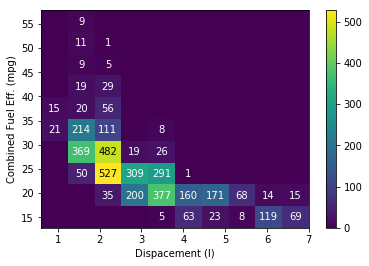

In [10]:
h2d = plt.hist2d(data= fuel_econ, x= 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0] 
bins_x = h2d[1]
bins_y = h2d[2]
dist_x = (bins_x[2] - bins_x[1])/2
dist_y = (bins_y[2] - bins_y[1])/2

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 450:
            plt.text(bins_x[i] + dist_x, bins_y[j] + dist_y, int(c),
                     ha= 'center', va= 'center', color= 'black')
        elif c > 0:
            plt.text(bins_x[i] + dist_x, bins_y[j] + dist_y, int(c),
                     ha= 'center', va= 'center', color= 'white')

## Violin Plots

To plot quantitative variables vs qualitative variables.

In [11]:
base_color = sb.color_palette()[0]

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered= True, categories= sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

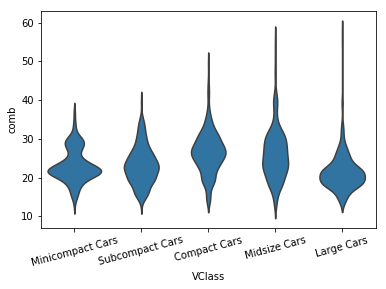

In [12]:
sb.violinplot(data= fuel_econ, x= 'VClass', y= 'comb', 
              color= base_color, inner= None)
plt.xticks(rotation= 15);

## Box Plots

Here is an remainder of the maining of the box plot parts:

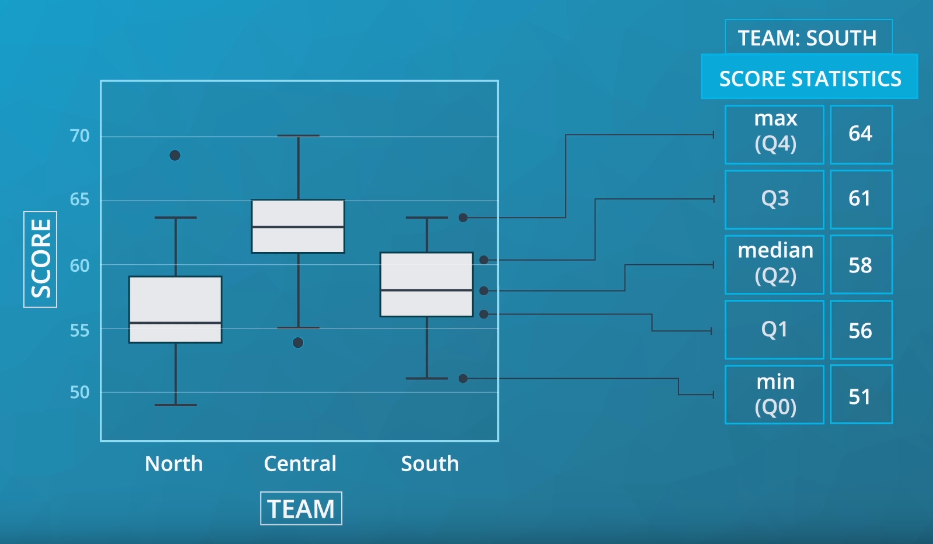

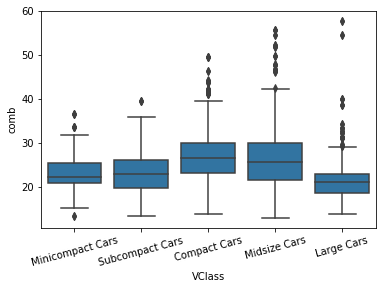

In [13]:
sb.boxplot(data= fuel_econ, x= 'VClass', y= 'comb', color= base_color)
plt.xticks(rotation= 15);

Violin plots and boc plots are closely related. In fact, leaving the parameter inner by default in **sb.violinplot** put a box plot on the middle of each violin area.

with *inner = 'quartile'*, horizontal dotted lines depicting the quartiles are shown over the violin area.

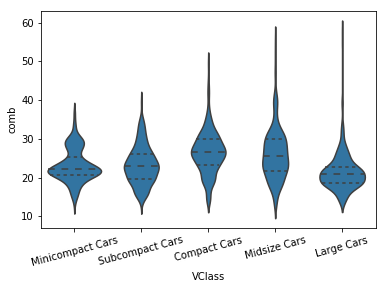

In [14]:
sb.violinplot(data= fuel_econ, x= 'VClass', y= 'comb', 
              color= base_color, inner = 'quartile')
plt.xticks(rotation= 15);

## Clustered Bar Charts and revisiting heatmaps

Clustered Bard charts need an array with

In [15]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [16]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
print(ct_counts)

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64


In [17]:
ct_counts = ct_counts.reset_index(name = 'count')
print(ct_counts)

             VClass trans_type  count
0  Minicompact Cars  Automatic    188
1  Minicompact Cars     Manual    133
2   Subcompact Cars  Automatic    502
3   Subcompact Cars     Manual    171
4      Compact Cars  Automatic    784
5      Compact Cars     Manual    338
6      Midsize Cars  Automatic    989
7      Midsize Cars     Manual    199
8        Large Cars  Automatic    605
9        Large Cars     Manual     20


In [18]:
ct_counts = ct_counts.pivot(index= 'VClass', columns= 'trans_type', values= 'count')
print(ct_counts)

trans_type        Automatic  Manual
VClass                             
Minicompact Cars        188     133
Subcompact Cars         502     171
Compact Cars            784     338
Midsize Cars            989     199
Large Cars              605      20


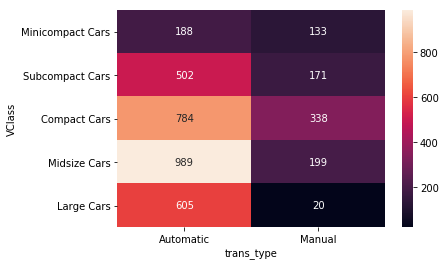

In [19]:
sb.heatmap(ct_counts, annot= True, fmt= 'd');

**Note:** The above graph is just for command demonstration purposes. It is not very readeable because the default color palette

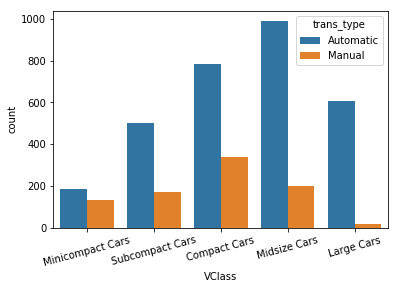

In [20]:
sb.countplot(data= fuel_econ, x= 'VClass', hue= 'trans_type')
plt.xticks(rotation= 15);

**Filtering and plotting Premium Gasoline and Regular Gasoline cars**

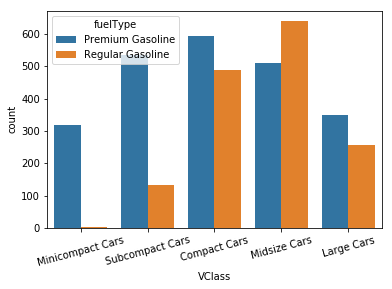

In [21]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

# plotting
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType');
plt.xticks(rotation = 15);

## Faceting

When faceting, it is important to keep the axis to the same scale in each plot. Plots with different scales are misleading.

To try ir, set *sharey = False*. (Is True by default)

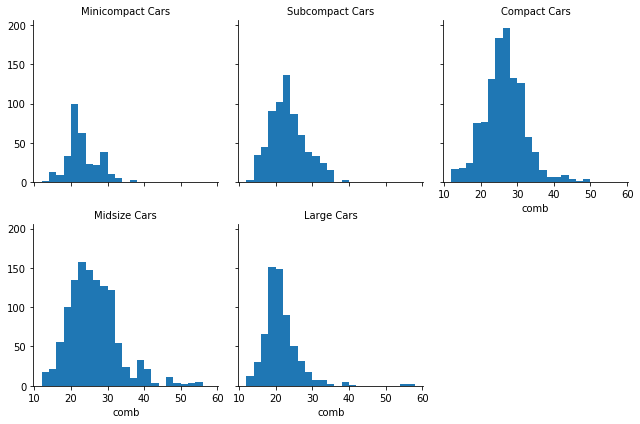

In [35]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = True);
g.map(plt.hist, 'comb', bins = bins);
g.set_titles('{col_name}')

**Plotting efficiency histograms for each manufacturer with more than 80 cars:** 

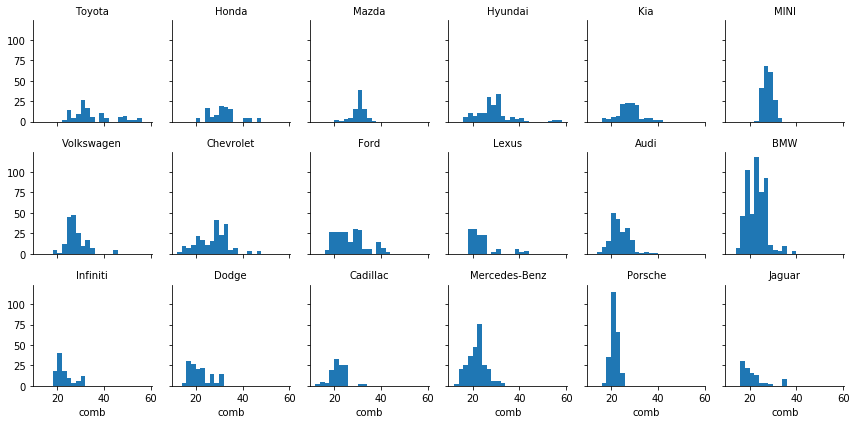

In [80]:
most_makes = fuel_econ['make'].value_counts().index[:18]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6,
                 size = 2, col_order = comb_order)
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max() + 2, 2))
g.set_titles('{col_name}')

**Mean fuel efficiency for each manufacturer:**

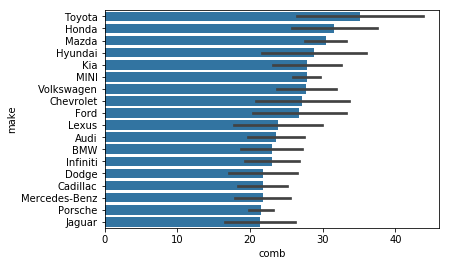

In [82]:
sb.barplot(data = fuel_econ_sub, y = 'make', x = 'comb', color = base_color,
           ci = 'sd', order = comb_order);

# Adaptation of Univariate plots

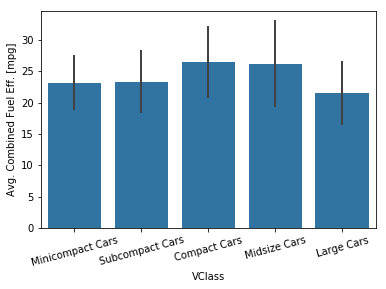

In [43]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color,
           ci = 'sd', errwidth = 2);
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. [mpg]');

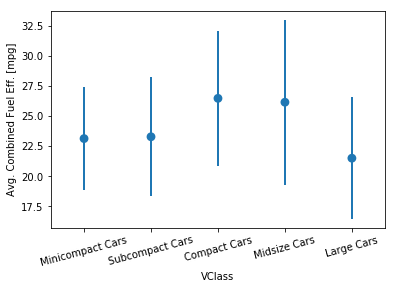

In [46]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
           ci = 'sd', errwidth = 2, linestyles = '');
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. [mpg]');

## Line plots

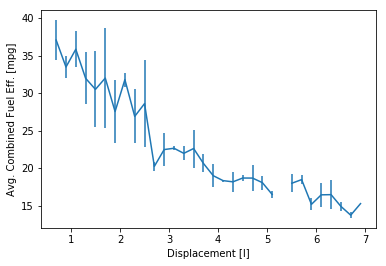

In [56]:
bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);
plt.xlabel('Displacement [l]')
plt.ylabel('Avg. Combined Fuel Eff. [mpg]');